In [0]:
import os

import tensorflow as tf

import pandas as pd
import numpy as np
from numpy import savetxt

import keras 
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation, Input, Lambda 
from keras.layers.core import Dense
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.utils import to_categorical

%matplotlib inline
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold

import itertools
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import random as rn

In [0]:
seed = 97
np.random.seed (seed)
rn.seed (seed)

In [0]:
All_data = pd.read_csv('All_data.csv')
All_data = pd.DataFrame.to_numpy(All_data)

COPD_data = All_data[0:40,1:24]
COPD_data_label = All_data[0:40,0:1]

HC_data = All_data[40:80,1:24]
HC_data_label = All_data[40:80,0:1]

Asthma_data = All_data[80:90,1:24]
Asthma_data_label = All_data[80:90,0:1]

Infec_data = All_data[90:100,1:24]
Infec_data_label = All_data[90:100,0:1]

In [0]:
# Data preparation for COPD vs. HC classification using SVM/ANN

predictors = np.concatenate([COPD_data, HC_data], axis=0)
target = np.concatenate([COPD_data_label, HC_data_label], axis=0).ravel()

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)

In [0]:
# SVM classifier performance
svc = SVC(kernel = 'rbf',C=1000, gamma=0.1, probability = True)

y_pred = svc.fit(X_train, y_train).predict(X_test)
t = pd.DataFrame(svc.predict_proba(X_test))
svc.score(X_train,y_train), svc.score(X_test, y_test)

(0.984375, 0.9375)

In [0]:
ANN = Sequential([
    Dropout(0.2, input_shape=(23,)), 
    Dense(4, activation='relu'),
    Dense(2, activation='softmax')
])




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
ANN.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
ANN.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=4000, shuffle=True, verbose=2)

Streaming output truncated to the last 5000 lines.
 - 0s - loss: 0.3417 - acc: 0.8571 - val_loss: 0.4634 - val_acc: 0.8182
Epoch 1502/4000
 - 0s - loss: 0.3618 - acc: 0.9524 - val_loss: 0.4635 - val_acc: 0.8182
Epoch 1503/4000
 - 0s - loss: 0.3664 - acc: 0.8571 - val_loss: 0.4637 - val_acc: 0.8182
Epoch 1504/4000
 - 0s - loss: 0.3389 - acc: 0.9524 - val_loss: 0.4636 - val_acc: 0.8182
Epoch 1505/4000
 - 0s - loss: 0.3649 - acc: 0.8810 - val_loss: 0.4637 - val_acc: 0.8182
Epoch 1506/4000
 - 0s - loss: 0.3315 - acc: 0.8810 - val_loss: 0.4638 - val_acc: 0.8182
Epoch 1507/4000
 - 0s - loss: 0.3263 - acc: 0.9048 - val_loss: 0.4638 - val_acc: 0.8182
Epoch 1508/4000
 - 0s - loss: 0.3630 - acc: 0.9048 - val_loss: 0.4637 - val_acc: 0.8182
Epoch 1509/4000
 - 0s - loss: 0.3927 - acc: 0.9048 - val_loss: 0.4636 - val_acc: 0.8182
Epoch 1510/4000
 - 0s - loss: 0.3997 - acc: 0.8810 - val_loss: 0.4635 - val_acc: 0.8182
Epoch 1511/4000
 - 0s - loss: 0.3828 - acc: 0.8810 - val_loss: 0.4635 - val_acc: 0.81

In [0]:
# 5-Folds Cross-validation of the ANN model

kf = KFold(n_splits = 5, shuffle = True)

scores = []
for i in range(5):
    result = next(kf.split(predictors), None)
    kfold_x_train = predictors[result[0]]
    kfold_x_test = predictors[result[1]]
    kfold_y_train = target[result[0]]
    kfold_y_test = target[result[1]]
    kfold_ANN = ANN.fit(kfold_x_train,kfold_y_train)
    kfold_predictions = ANN.predict_classes(kfold_x_test)
    scores.append(np.mean(kfold_y_test==kfold_predictions))
print('Scores from each iteration: ', scores)
print('Average 5-Fold Score :' , np.mean(scores))

Epoch 1/1
64/64 [==============================] - 0s 280us/step - loss: 0.2410 - acc: 0.8906
Epoch 1/1
64/64 [==============================] - 0s 175us/step - loss: 0.2174 - acc: 0.9219
Epoch 1/1
64/64 [==============================] - 0s 164us/step - loss: 0.4103 - acc: 0.8125
Epoch 1/1
64/64 [==============================] - 0s 162us/step - loss: 0.2324 - acc: 0.8750
Epoch 1/1
64/64 [==============================] - 0s 186us/step - loss: 0.2478 - acc: 0.8750
Scores from each iteration:  [1.0, 0.9375, 0.9375, 0.875, 1.0]
Average 5-Fold Score : 0.95


In [0]:
predictions = ANN.predict(X_test, batch_size=5, verbose=0)

In [0]:
rounded_predictions = ANN.predict_classes(X_test, batch_size=10, verbose=0)

In [0]:
Network_Performance = np.mean(y_test==rounded_predictions)
Network_Performance

0.9375

In [0]:
cm = confusion_matrix(y_test, rounded_predictions)

In [0]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('Actual Medical Diagnosis')
    plt.xlabel('Neural Network Prediction')

Confusion matrix, without normalization
[[8 1]
 [0 7]]


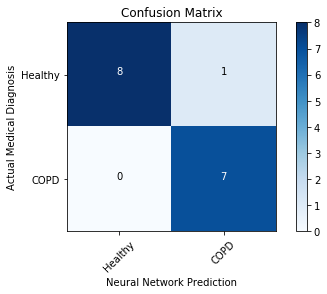

In [0]:
cm_plot_labels = ['Healthy', 'COPD']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [0]:
# Developing a Siamese network for a few-shot learning

In [0]:
y_genuine = np.ones([20, 1])
y_imposite = np.zeros([20, 1])
Y = np.concatenate([y_genuine, y_imposite], axis=0)

In [0]:
x_genuine=np.zeros([20, 2, 23])

for i in range (20): 
  x_genuine[i, 0, :]= COPD_data[i, :]
  x_genuine[i, 1, :]= COPD_data[i+20, :]


x_imposite=np.zeros([20, 2, 23])

for i in range (20): 
  x_imposite[i, 0, :]= COPD_data[i, :]
  x_imposite[i, 1, :]= HC_data[i, :]

X = np.concatenate([x_genuine, x_imposite], axis=0)

In [0]:
x_sms_train, x_sms_test, y_sms_train, y_sms_test = train_test_split(X, Y, test_size=.25)

In [0]:
input_dim = x_sms_train.shape[2:]
in_a = Input(shape=input_dim)
in_b = Input(shape=input_dim)

In [0]:
def build_base_network(input_shape):
    
    seq = Sequential()

    seq.add(Dense(4, input_shape=input_shape, activation='relu'))
    
    return seq

In [0]:
base_network = build_base_network(input_dim)
base_network.set_weights(ANN.get_weights()) 

In [0]:
feat_vecs_a = base_network(in_a)
feat_vecs_b = base_network(in_b)

In [0]:
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [0]:
distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([feat_vecs_a, feat_vecs_b])

In [0]:
model_siamese = Model(input=[in_a, in_b], output=distance)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("la...)`
  """Entry point for launching an IPython kernel.


In [0]:
def contrastive_loss(y_true, y_pred):
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

In [0]:
model_siamese.compile(loss=contrastive_loss, optimizer=RMSprop(lr=.0001))

In [0]:
in_1 = x_sms_train[:, 0]
in_2 = x_sms_train[:, 1]

In [0]:
model_siamese.fit([in_1, in_2], y_sms_train, validation_split=.25,
          batch_size=10, verbose=2, epochs=1000)

Train on 22 samples, validate on 8 samples
Epoch 1/1000
 - 0s - loss: 1.2361 - val_loss: 1.8235
Epoch 2/1000
 - 0s - loss: 1.2332 - val_loss: 1.8216
Epoch 3/1000
 - 0s - loss: 1.2311 - val_loss: 1.8200
Epoch 4/1000
 - 0s - loss: 1.2295 - val_loss: 1.8189
Epoch 5/1000
 - 0s - loss: 1.2284 - val_loss: 1.8179
Epoch 6/1000
 - 0s - loss: 1.2272 - val_loss: 1.8169
Epoch 7/1000
 - 0s - loss: 1.2262 - val_loss: 1.8156
Epoch 8/1000
 - 0s - loss: 1.2247 - val_loss: 1.8144
Epoch 9/1000
 - 0s - loss: 1.2231 - val_loss: 1.8137
Epoch 10/1000
 - 0s - loss: 1.2223 - val_loss: 1.8130
Epoch 11/1000
 - 0s - loss: 1.2216 - val_loss: 1.8122
Epoch 12/1000
 - 0s - loss: 1.2206 - val_loss: 1.8111
Epoch 13/1000
 - 0s - loss: 1.2194 - val_loss: 1.8103
Epoch 14/1000
 - 0s - loss: 1.2185 - val_loss: 1.8090
Epoch 15/1000
 - 0s - loss: 1.2172 - val_loss: 1.8083
Epoch 16/1000
 - 0s - loss: 1.2164 - val_loss: 1.8071
Epoch 17/1000
 - 0s - loss: 1.2152 - val_loss: 1.8060
Epoch 18/1000
 - 0s - loss: 1.2141 - val_loss: 1

In [0]:
predi = model_siamese.predict([x_sms_test[:, 0], x_sms_test[:, 1]])

In [0]:
def compute_accuracy(predictions, labels):
    return labels[predictions.ravel() < 0.5].mean()

compute_accuracy(predi, y_sms_test)

1.0

In [0]:
# 5-Folds Cross-validation of the Siamese model

kf = KFold(n_splits = 5, shuffle = True)

siamese_scores = []
for i in range(5):
    result = next(kf.split(X), None)
    kfold_x_siamese_train = X[result[0]]
    kfold_x_siamese_test = X[result[1]]
    kfold_y_siamese_train = Y[result[0]]
    kfold_y_siamese_test = Y[result[1]]
    kfold_model_siamese = model_siamese.fit([kfold_x_siamese_train[:, 0], kfold_x_siamese_train[:, 1]], kfold_y_siamese_train)
    sms_predi = model_siamese.predict([kfold_x_siamese_test[:, 0], kfold_x_siamese_test[:, 1]])
    siamese_scores.append(compute_accuracy(sms_predi, kfold_y_siamese_test))

print('Scores from each iteration: ', siamese_scores)
print('Average 5-Fold Siamese_Score :' , np.mean(siamese_scores))

Epoch 1/1
32/32 [==============================] - 0s 157us/step - loss: 1.4810
Epoch 1/1
32/32 [==============================] - 0s 103us/step - loss: 1.4837
Epoch 1/1
32/32 [==============================] - 0s 92us/step - loss: 1.1142
Epoch 1/1
32/32 [==============================] - 0s 113us/step - loss: 0.9516
Epoch 1/1
32/32 [==============================] - 0s 130us/step - loss: 1.4463
Scores from each iteration:  [1.0, 1.0, 1.0, 1.0, 1.0]
Average 5-Fold Siamese_Score : 1.0


In [0]:
#Zero-shot learning:

test = model_siamese.predict([COPD_data[0:10,:], Asthma_data[0:10,:]])
for i in range (10): 
  if (test[i,] < 0.45): 
    test[i,]=1
  else:
   test[i,]=0

test

# Label '1' means the two samples are the same and label '0' means they are different.

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [0]:
test = model_siamese.predict([Asthma_data[0:10,:], Infec_data[0:10,:]])
for i in range (10): 
  if (test[i,] < 0.45): 
    test[i,]=1
  else:
   test[i,]=0

test

# Label '1' means the two samples are the same and label '0' means they are different.

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [0]:
test = model_siamese.predict([COPD_data[0:10,:], COPD_data[5:15,:]])
for i in range (10): 
  if (test[i,] < 0.45): 
    test[i,]=1
  else:
   test[i,]=0

test

# Label '1' means the two samples are the same and label '0' means they are different.

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [0]:
test = model_siamese.predict([Infec_data[0:10,:], COPD_data[10:20,:]])
for i in range (10): 
  if (test[i,] < 0.45): 
    test[i,]=1
  else:
   test[i,]=0

test

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [0]:
#One-shot learning

in_1 = np.zeros([10, 23])
for i in range (10):
  in_1[i,:] = Asthma_data[0,:]


in_2 = np.zeros([10, 23])
for i in range (10):
  in_2[i,:] = COPD_data[i,:]


y_in = np.zeros([10, 1])

model_siamese.fit([in_1, in_2], y_in, batch_size=2, verbose=2, epochs=500)

Epoch 1/500
 - 0s - loss: 0.0000e+00
Epoch 2/500
 - 0s - loss: 0.0000e+00
Epoch 3/500
 - 0s - loss: 0.0000e+00
Epoch 4/500
 - 0s - loss: 0.0000e+00
Epoch 5/500
 - 0s - loss: 0.0000e+00
Epoch 6/500
 - 0s - loss: 0.0000e+00
Epoch 7/500
 - 0s - loss: 0.0000e+00
Epoch 8/500
 - 0s - loss: 0.0000e+00
Epoch 9/500
 - 0s - loss: 0.0000e+00
Epoch 10/500
 - 0s - loss: 0.0000e+00
Epoch 11/500
 - 0s - loss: 0.0000e+00
Epoch 12/500
 - 0s - loss: 0.0000e+00
Epoch 13/500
 - 0s - loss: 0.0000e+00
Epoch 14/500
 - 0s - loss: 0.0000e+00
Epoch 15/500
 - 0s - loss: 0.0000e+00
Epoch 16/500
 - 0s - loss: 0.0000e+00
Epoch 17/500
 - 0s - loss: 0.0000e+00
Epoch 18/500
 - 0s - loss: 0.0000e+00
Epoch 19/500
 - 0s - loss: 0.0000e+00
Epoch 20/500
 - 0s - loss: 0.0000e+00
Epoch 21/500
 - 0s - loss: 0.0000e+00
Epoch 22/500
 - 0s - loss: 0.0000e+00
Epoch 23/500
 - 0s - loss: 0.0000e+00
Epoch 24/500
 - 0s - loss: 0.0000e+00
Epoch 25/500
 - 0s - loss: 0.0000e+00
Epoch 26/500
 - 0s - loss: 0.0000e+00
Epoch 27/500
 - 0s - 

In [0]:
test = model_siamese.predict([COPD_data[0:10,:], Asthma_data[0:10,:]])
for i in range (10): 
  if (test[i,] < 0.45): 
    test[i,]=1
  else:
   test[i,]=0

test

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [0]:
test = model_siamese.predict([Asthma_data[0:10,:], Infec_data[0:10,:]])
for i in range (10): 
  if (test[i,] < 0.45): 
    test[i,]=1
  else:
   test[i,]=0

test

# Label '1' means the two samples are the same and label '0' means they are different.

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [0]:
#Five-shot learning

in_1 = Asthma_data[0:5,:]

in_2 = COPD_data[0:5,:]

y_in = np.zeros([5, 1])

model_siamese.fit([in_1, in_2], y_in, batch_size=2, verbose=2, epochs=500)

Epoch 1/500
 - 0s - loss: 0.0000e+00
Epoch 2/500
 - 0s - loss: 0.0000e+00
Epoch 3/500
 - 0s - loss: 0.0000e+00
Epoch 4/500
 - 0s - loss: 0.0000e+00
Epoch 5/500
 - 0s - loss: 0.0000e+00
Epoch 6/500
 - 0s - loss: 0.0000e+00
Epoch 7/500
 - 0s - loss: 0.0000e+00
Epoch 8/500
 - 0s - loss: 0.0000e+00
Epoch 9/500
 - 0s - loss: 0.0000e+00
Epoch 10/500
 - 0s - loss: 0.0000e+00
Epoch 11/500
 - 0s - loss: 0.0000e+00
Epoch 12/500
 - 0s - loss: 0.0000e+00
Epoch 13/500
 - 0s - loss: 0.0000e+00
Epoch 14/500
 - 0s - loss: 0.0000e+00
Epoch 15/500
 - 0s - loss: 0.0000e+00
Epoch 16/500
 - 0s - loss: 0.0000e+00
Epoch 17/500
 - 0s - loss: 0.0000e+00
Epoch 18/500
 - 0s - loss: 0.0000e+00
Epoch 19/500
 - 0s - loss: 0.0000e+00
Epoch 20/500
 - 0s - loss: 0.0000e+00
Epoch 21/500
 - 0s - loss: 0.0000e+00
Epoch 22/500
 - 0s - loss: 0.0000e+00
Epoch 23/500
 - 0s - loss: 0.0000e+00
Epoch 24/500
 - 0s - loss: 0.0000e+00
Epoch 25/500
 - 0s - loss: 0.0000e+00
Epoch 26/500
 - 0s - loss: 0.0000e+00
Epoch 27/500
 - 0s - 

In [0]:
test = model_siamese.predict([COPD_data[0:10,:], Asthma_data[0:10,:]])
for i in range (10): 
  if (test[i,] < 0.45): 
    test[i,]=1
  else:
   test[i,]=0

test

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [0]:
test = model_siamese.predict([Asthma_data[0:10,:], Infec_data[0:10,:]])
for i in range (10): 
  if (test[i,] < 0.45): 
    test[i,]=1
  else:
   test[i,]=0

test

# Label '1' means the two samples are the same and label '0' means they are different.

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)